## Simple Linear Regression

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

## Least Squared Error Model

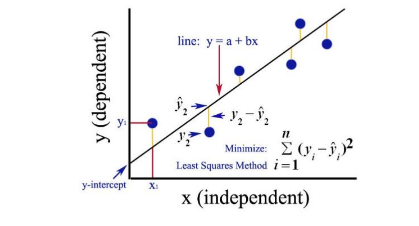

# step-1: Data Ingestion 

In [3]:
import pandas as pd
df = pd.read_csv("50_Startup.csv")
df.head()

ModuleNotFoundError: No module named 'pandas'